In [1]:
import pandas as pd
import numpy as np


In [2]:
df_data = pd.read_csv("scaled_data.csv")
df_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,Var,EMA5,EMA12,EMA26,MACD,Signal,Short_Gain,Long_Gain
0,2011-08-18,95.735754,98.373622,93.180061,0.009255,512956300,0.0,0,0.615385,0.75,0.547045,0.014992,0.002356,0.001217,0.000619,0.717638,0.716671,0.056152,0.111827
1,2011-08-19,92.826686,95.226241,92.448674,0.004940,428281300,0.0,0,0.615385,1.00,0.547045,0.014992,0.000900,0.000540,0.000289,0.713814,0.715758,0.046254,0.119576
2,2011-08-22,94.642816,94.692126,92.374746,0.005148,275090600,0.0,0,0.634615,0.00,0.465403,0.014992,0.000000,0.000000,0.000000,0.711045,0.714367,0.037789,0.124211
3,2011-08-23,92.982843,95.793282,92.514437,0.013708,331136600,0.0,0,0.634615,0.25,0.551041,0.014992,0.002288,0.000886,0.000386,0.716538,0.714566,0.033064,0.071126
4,2011-08-24,95.481004,97.165621,95.259124,0.017492,246869700,0.0,0,0.634615,0.50,0.711575,0.010164,0.005090,0.002229,0.001032,0.724208,0.716555,0.008130,0.039480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2021-08-11,443.820007,443.880005,442.619995,0.991043,44034300,0.0,0,0.596154,0.50,0.553264,0.001560,0.992366,0.993243,0.993566,0.827174,0.846570,0.006539,0.038505
2512,2021-08-12,443.619995,445.260010,442.660004,0.994778,38909400,0.0,0,0.596154,0.75,0.559468,0.003951,0.994905,0.995225,0.995284,0.830260,0.847467,0.006539,0.038505
2513,2021-08-13,445.589996,445.940002,445.070007,0.997052,39388300,0.0,0,0.596154,1.00,0.562028,0.006821,0.997365,0.997259,0.997048,0.833409,0.848937,0.006539,0.038505
2514,2021-08-16,444.529999,447.109985,442.869995,1.000000,73740000,0.0,0,0.615385,0.00,0.556143,0.007743,1.000000,0.999443,0.998907,0.837171,0.851010,0.006539,0.038505


In [3]:
def xy_priceinputs(df, x_len=60, y_len=10):
    prices = df.Close
    X = []
    y = []
    for i in range(len(prices) - x_len - y_len):
        X.append(prices[i:i+x_len])
        y.append([prices[i+x_len], prices[i+x_len+y_len]])

    return np.array(X), np.array(y)

X,y = xy_priceinputs(df_data)
print(X.shape, y.shape)
X_train, X_test = X[:-50], X[-50:]
y_train, y_test = y[:-50], y[-50:]

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
y_train = y_train.reshape(y_train.shape[0],y_train.shape[1] , 1)
y_test = y_test.reshape(y_test.shape[0],y_test.shape[1] , 1)


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(y_test[0])

(2446, 60) (2446, 2)
(2396, 60, 1) (50, 60, 1)
(2396, 2, 1) (50, 2, 1)
[[0.91810875]
 [0.92681215]]


# Model

In [4]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

def LSTM_model():
    model = Sequential()
    model.add(LSTM(100, input_shape=(X.shape[1],1), return_sequences=True))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(75, return_sequences=False))
    # model.add(Dense(50, activation='relu'))
    model.add(Dense(2))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = LSTM_model()

In [ ]:
from keras.callbacks import EarlyStopping
np.random.seed(1)

callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, verbose=1)

model.fit(X_train, y_train, epochs=50, batch_size=62, callbacks=[callback])

Epoch 1/50
39/39 [==============================] - 10s 150ms/step - loss: 0.0136
Epoch 2/50
39/39 [==============================] - 5s 138ms/step - loss: 7.3844e-04
Epoch 3/50
39/39 [==============================] - 6s 143ms/step - loss: 5.8900e-04
Epoch 4/50
39/39 [==============================] - 6s 144ms/step - loss: 5.6988e-04
Epoch 5/50
39/39 [==============================] - 6s 152ms/step - loss: 5.6799e-04
Epoch 6/50
39/39 [==============================] - 5s 138ms/step - loss: 5.7150e-04
Epoch 7/50
39/39 [==============================] - 5s 138ms/step - loss: 5.4920e-04
Epoch 8/50
39/39 [==============================] - 5s 140ms/step - loss: 6.3415e-04
Epoch 9/50
39/39 [==============================] - 5s 137ms/step - loss: 5.3120e-04
Epoch 10/50
39/39 [==============================] - 5s 135ms/step - loss: 5.6066e-04
Epoch 11/50
39/39 [==============================] - 6s 148ms/step - loss: 5.1088e-04
Epoch 12/50
39/39 [==============================] - 6s 144ms/step

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 44ms/step - loss: 1.6312e-04


0.0001631167542655021

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# for i in range(len(y_train)):
#     # print(y_pred_train[i], y_train[i][:,0])

#     sns.lineplot(x=np.arange(i,i+len(y_train[i])), y= y_train[i][:,0])
#     sns.lineplot(x=np.arange(i,i+len(y_pred_train[i])), y= y_pred_train[i])

[0.03515793 0.03517348 0.03519567 ... 0.9019822  0.9003339  0.89982474] [0.03880009 0.03601704 0.03745496 ... 0.89485293 0.90722247 0.90627096]


<AxesSubplot:>

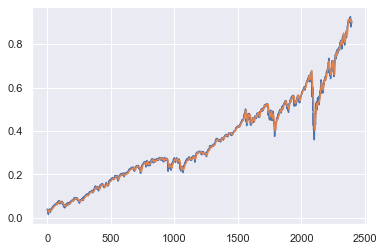

In [ ]:
print(y_pred_train[:,0], y_train[:,0,0])

sns.lineplot(x=np.arange(0,len(y_train)), y= y_train[:,0,0])
sns.lineplot(x=np.arange(0,len(y_pred_train)), y= y_pred_train[:,0])

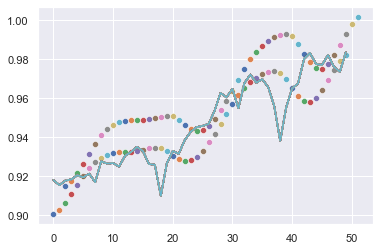

In [ ]:
for i in range(len(y_test)):
    # print(y_pred_train[i], y_train[i][:,0])

    sns.lineplot(x=np.arange(0,len(y_test)), y= y_test[:,0,0])
    sns.scatterplot(x=[i,i+len(y_pred_test[i])], y= y_pred_test[i])

[0.90047246 0.90281105 0.90643483 0.9109162  0.9156987  0.9203538
 0.92438626 0.9275908  0.9295634  0.9309234  0.93182576 0.93237925
 0.93252677 0.93263215 0.9329169  0.9335639  0.93438053 0.93479085
 0.9345924  0.93281525 0.93054634 0.9287606  0.92778915 0.92814505
 0.9300219  0.9332606  0.9373988  0.9419059  0.946646   0.9517969
 0.95688826 0.96172833 0.96535206 0.96821547 0.97066724 0.9724981
 0.9737489  0.97417283 0.9731924  0.9697851  0.9652883  0.961208
 0.95846015 0.95814013 0.96042794 0.9644447  0.9692796  0.97444504
 0.97898483 0.98224247] [0.91810875 0.91550611 0.9178289  0.91844454 0.92054345 0.91950805
 0.92135496 0.91698929 0.92770771 0.92656032 0.92681215 0.92504903
 0.93053416 0.93249314 0.93515173 0.93296894 0.92633634 0.9259446
 0.91001387 0.92669142 0.9330087  0.93157684 0.93859604 0.94283558
 0.94525023 0.94589603 0.94690675 0.95356094 0.96279823 0.96058014
 0.96487589 0.95493676 0.96785202 0.972232   0.96804858 0.96987356
 0.96569014 0.95611594 0.93823103 0.95532979

<AxesSubplot:>

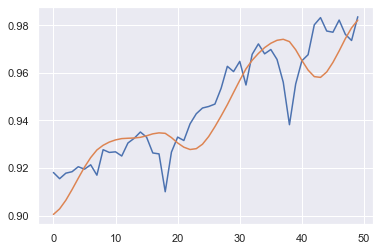

In [ ]:
print(y_pred_test[:,0], y_test[:,0,0])

sns.lineplot(x=np.arange(0,len(y_test)), y= y_test[:,0,0])
sns.lineplot(x=np.arange(0,len(y_pred_test)), y= y_pred_test[:,0])

# Colab Model

In [ ]:
from keras.models import load_model
dual_model = load_model("Dualout_model.h5")